<a href="https://www.kaggle.com/code/shaheerhussain/indian-rupee-to-dollar-analysis-with-rnn-and-lstm?scriptVersionId=145682400" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inr-usd/INRtoUSD.csv


# Importing necessary libraries: Start by importing the required libraries for data analysis and modeling, such as Pandas, NumPy, Matplotlib, and scikit-learn.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Loading the dataset: Read the CSV file using Pandas and load it into a DataFrame.


In [3]:
data = pd.read_csv('/kaggle/input/inr-usd/INRtoUSD.csv')


Exploratory data analysis: Perform initial data exploration to understand the structure and characteristics of the dataset.

In [4]:
data.head()  # Display the first few rows of the dataset
data.info()  # Get information about the columns and data types
data.describe()  # Statistical summary of the numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5036 entries, 0 to 5035
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5036 non-null   object 
 1   Open       5004 non-null   float64
 2   High       5004 non-null   float64
 3   Low        5004 non-null   float64
 4   Close      5004 non-null   float64
 5   Adj Close  5004 non-null   float64
 6   Volume     5004 non-null   float64
dtypes: float64(6), object(1)
memory usage: 275.5+ KB


,Open,High,Low,Close,Adj Close,Volume
count,5004.000000,5004.000000,5004.000000,5004.000000,5004.000000,5004.0
mean,57.895523,58.102187,57.713104,57.896945,57.896945,0.0
std,12.488931,12.524872,12.440528,12.501082,12.501082,0.0
min,38.995998,39.235001,38.979000,39.044998,39.044998,0.0
25%,45.474998,45.618000,45.398249,45.467499,45.467499,0.0
50%,59.558001,59.847898,59.241501,59.558001,59.558001,0.0
75%,68.321377,68.558252,68.092496,68.365648,68.365648,0.0
max,82.997002,83.386002,82.779503,82.997002,82.997002,0.0


Data preprocessing: Prepare the data for modeling by handling missing values, scaling, and splitting it into training and testing sets.

In [5]:
# Handle missing values if any
data.dropna(inplace=True)

# Split the dataset into features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
y = data['Close'].values

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


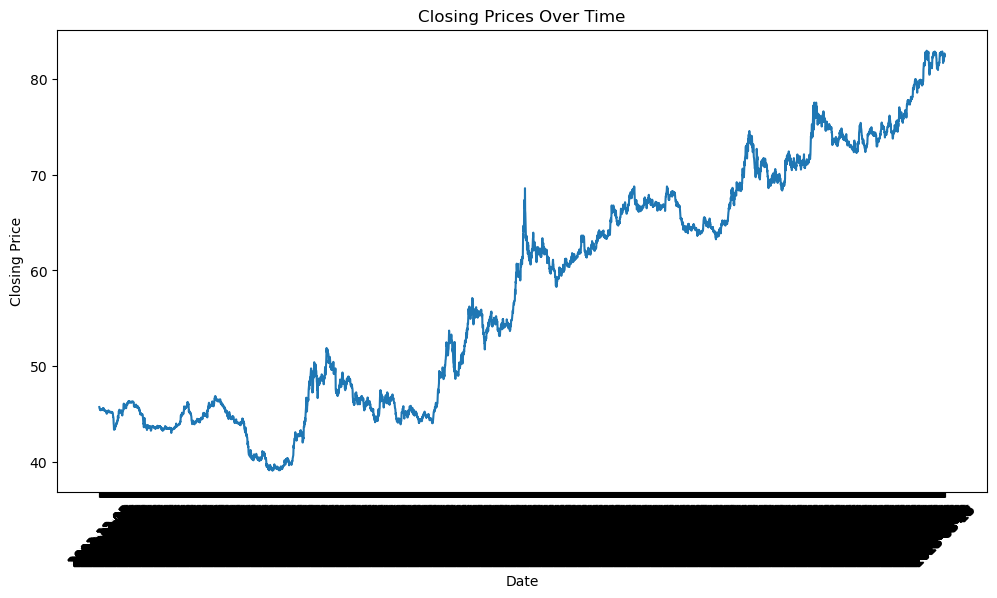

In [6]:
# Plotting closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices Over Time')
plt.xticks(rotation=45)
plt.show()

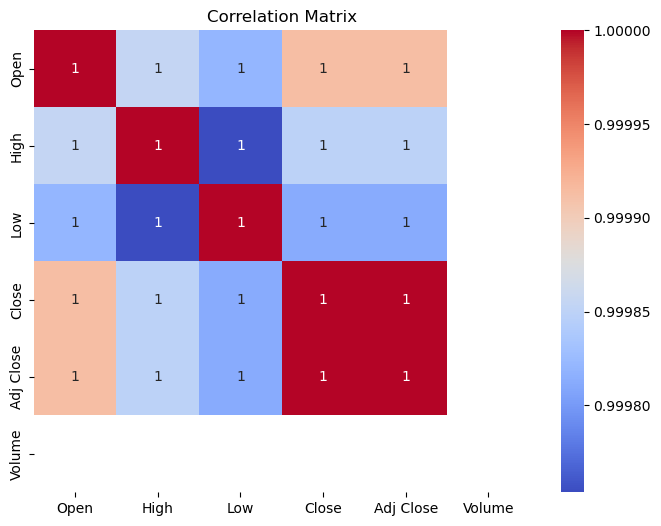

In [7]:
# Correlation matrix
corr_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

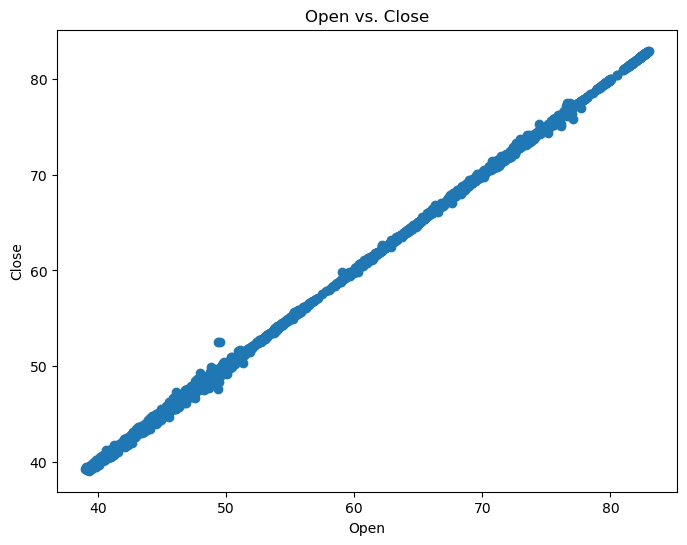

In [8]:
# Scatter plot of 'Open' vs. 'Close'
plt.figure(figsize=(8, 6))
plt.scatter(data['Open'], data['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Open vs. Close')
plt.show()

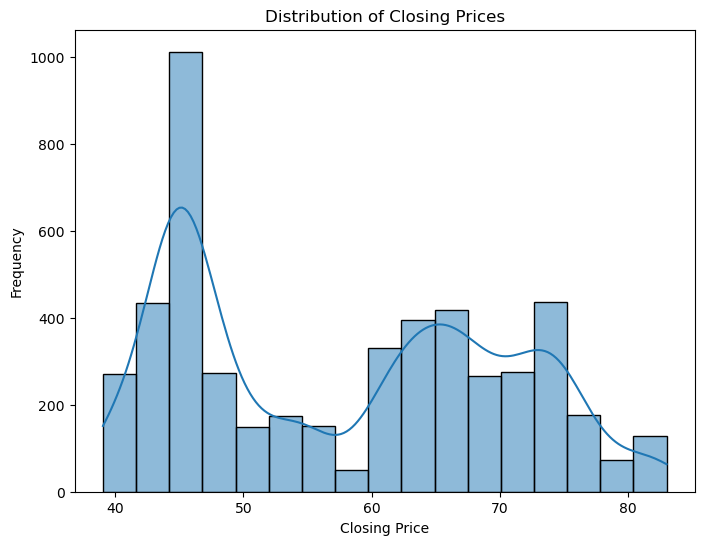

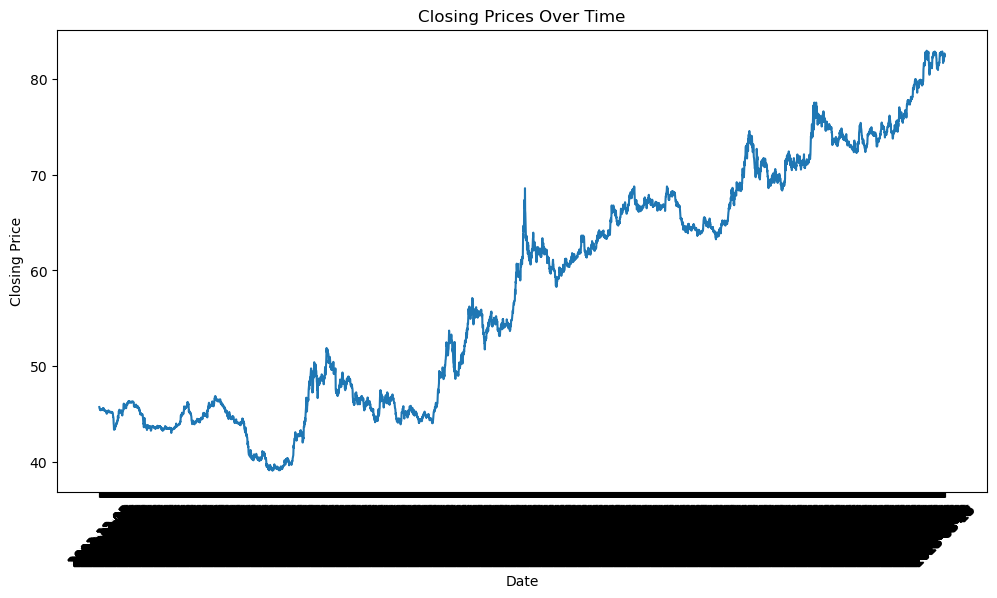

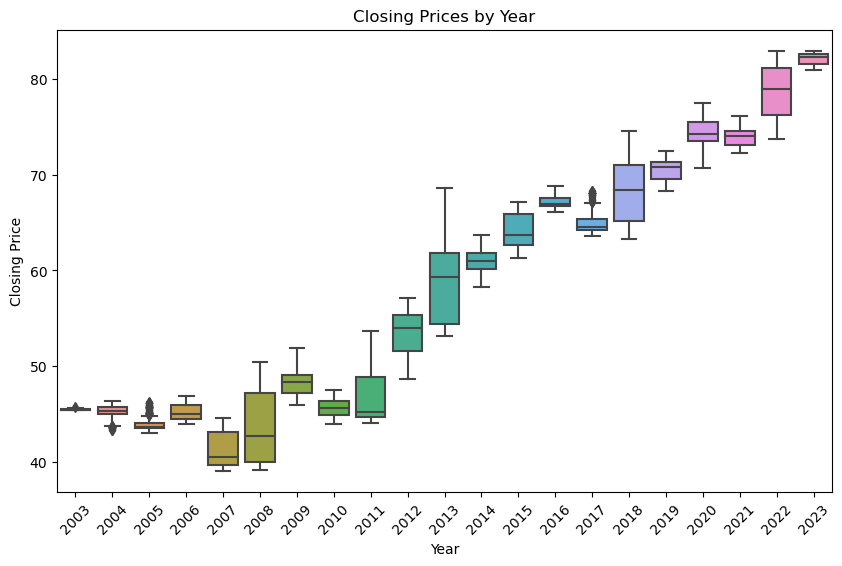

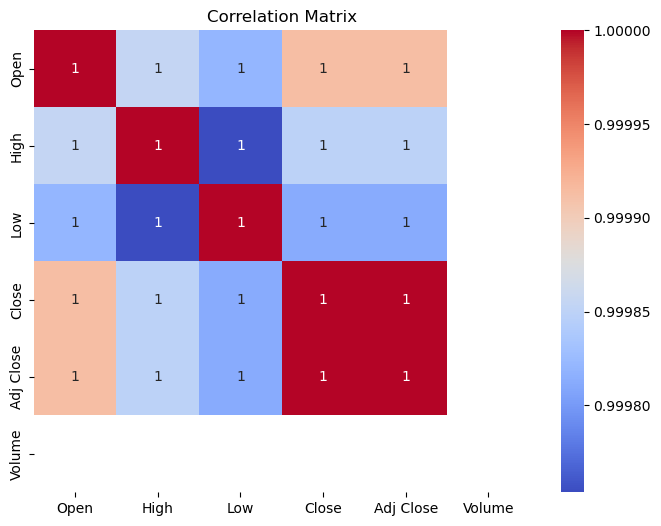

In [9]:
# Plotting the distribution of closing prices
plt.figure(figsize=(8, 6))
sns.histplot(data['Close'], kde=True)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.show()

# Line plot of closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices Over Time')
plt.xticks(rotation=45)
plt.show()

# Box plot of closing prices by year
data['Year'] = pd.to_datetime(data['Date']).dt.year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Close', data=data)
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Prices by Year')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix
corr_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Load the dataset
data = pd.read_csv('/kaggle/input/inr-usd/INRtoUSD.csv')

# Line plot of closing prices over time using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Closing Price'))
fig.update_layout(title='Closing Prices Over Time', xaxis_title='Date', yaxis_title='Closing Price')
fig.show()

# Box plot of closing prices by year using Plotly Express
data['Year'] = pd.to_datetime(data['Date']).dt.year
fig = px.box(data, x='Year', y='Close', title='Closing Prices by Year')
fig.show()

# Correlation heatmap using Plotly
corr_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
                               x=corr_matrix.columns,
                               y=corr_matrix.columns,
                               colorscale='RdBu',
                               zmin=-1, zmax=1))
fig.update_layout(title='Correlation Heatmap')
fig.show()


In [11]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.update_layout(title='Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()


In [12]:
# Drop any missing values
data.dropna(inplace=True)

# Split the dataset into features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
y = data['Close'].values

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input for LSTM and RNN models
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [13]:
# Build and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32)

# Evaluate the LSTM model
lstm_test_loss = lstm_model.evaluate(X_test_lstm, y_test)
print(f'LSTM Test Loss: {lstm_test_loss}')

Epoch 1/50
126/126 [==============================] - 3s 5ms/step - loss: 2586.7463
Epoch 2/50
126/126 [==============================] - 1s 5ms/step - loss: 1378.2430
Epoch 3/50
126/126 [==============================] - 1s 5ms/step - loss: 896.0856
Epoch 4/50
126/126 [==============================] - 1s 5ms/step - loss: 589.4462
Epoch 5/50
126/126 [==============================] - 1s 5ms/step - loss: 396.7170
Epoch 6/50
126/126 [==============================] - 1s 5ms/step - loss: 281.3889
Epoch 7/50
126/126 [==============================] - 1s 5ms/step - loss: 216.5444
Epoch 8/50
126/126 [==============================] - 1s 5ms/step - loss: 182.6946
Epoch 9/50
126/126 [==============================] - 1s 4ms/step - loss: 166.0300
Epoch 10/50
126/126 [==============================] - 1s 5ms/step - loss: 158.1506
Epoch 11/50
126/126 [==============================] - 1s 5ms/step - loss: 154.0170
Epoch 12/50
126/126 [==============================] - 1s 4ms/step - loss: 97.5333


In [14]:
# Build and train the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(X_train_rnn.shape[1], 1)))
rnn_model.add(Dense(1))
rnn_model.compile(loss='mean_squared_error', optimizer='adam')
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32)

# Evaluate the RNN model
rnn_test_loss = rnn_model.evaluate(X_test_rnn, y_test)
print(f'RNN Test Loss: {rnn_test_loss}')


Epoch 1/50
126/126 [==============================] - 1s 2ms/step - loss: 2456.8918
Epoch 2/50
126/126 [==============================] - 0s 2ms/step - loss: 1515.4744
Epoch 3/50
126/126 [==============================] - 0s 2ms/step - loss: 1024.1451
Epoch 4/50
126/126 [==============================] - 0s 2ms/step - loss: 692.3570
Epoch 5/50
126/126 [==============================] - 0s 2ms/step - loss: 472.9337
Epoch 6/50
126/126 [==============================] - 0s 2ms/step - loss: 333.6926
Epoch 7/50
126/126 [==============================] - 0s 2ms/step - loss: 249.4642
Epoch 8/50
126/126 [==============================] - 0s 2ms/step - loss: 202.2247
Epoch 9/50
126/126 [==============================] - 0s 3ms/step - loss: 177.2453
Epoch 10/50
126/126 [==============================] - 0s 3ms/step - loss: 164.9762
Epoch 11/50
126/126 [==============================] - 0s 3ms/step - loss: 159.3900
Epoch 12/50
126/126 [==============================] - 0s 3ms/step - loss: 157.125

32/32 [==============================] - 0s 2ms/step


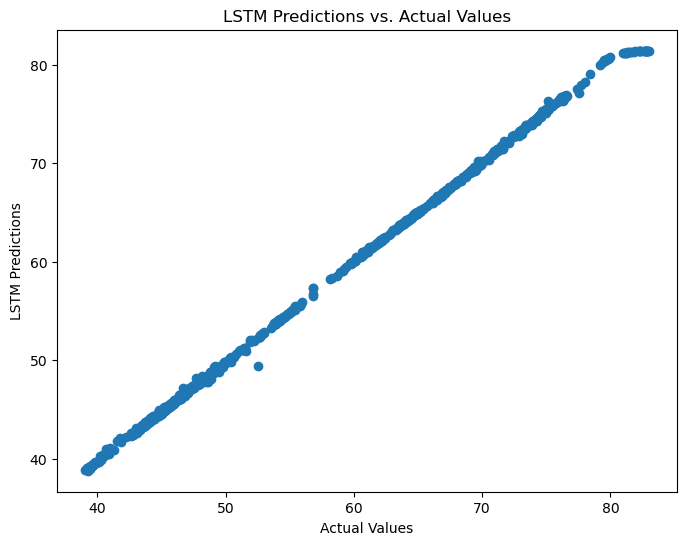

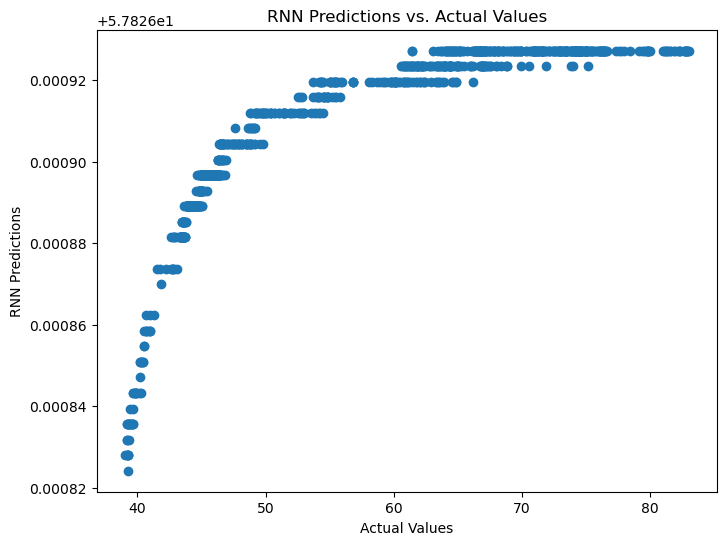

In [15]:
# Generate predictions using the LSTM model
lstm_predictions = lstm_model.predict(X_test_lstm)

# Generate predictions using the RNN model
rnn_predictions = rnn_model.predict(X_test_rnn)

# Scatter plot of LSTM predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lstm_predictions)
plt.xlabel('Actual Values')
plt.ylabel('LSTM Predictions')
plt.title('LSTM Predictions vs. Actual Values')
plt.show()

# Scatter plot of RNN predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rnn_predictions)
plt.xlabel('Actual Values')
plt.ylabel('RNN Predictions')
plt.title('RNN Predictions vs. Actual Values')
plt.show()


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE for LSTM model
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
print(f'LSTM MAE: {lstm_mae}')

# Calculate MAE for RNN model
rnn_mae = mean_absolute_error(y_test, rnn_predictions)
print(f'RNN MAE: {rnn_mae}')

# Calculate RMSE for LSTM model
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
print(f'LSTM RMSE: {lstm_rmse}')

# Calculate RMSE for RNN model
rnn_rmse = np.sqrt(mean_squared_error(y_test, rnn_predictions))
print(f'RNN RMSE: {rnn_rmse}')

LSTM MAE: 0.21167780916520007
RNN MAE: 11.500682294150918
LSTM RMSE: 0.3031351526192705
RNN RMSE: 12.565065465031664
